# Project: IMDB-Movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The dataset that I will be wrangling is the **TMDB Movie** this is data contain information about 10,000 movies collected from the movie database.

<ol>
    <li>Whose is the popular genres over years? <a href='#1'>Here</a></li>
    <br>
    <li>Where is the most correlation with revenue? <a href='#2'>Here</a></li>
    <br>
    <li>What is the most genre revenue & budget? <a href='#3'>Here</a></li>
    <br>
    <li>Whose is the top production revenue & budget? <a href='#4'>Here</a></li>
    <br>
    <li>Whose is the top production company that has product? <a href='#5'>Here</a></li>
    <br>
    <li>When revenue & budget & popularity goes up? <a href='#6'>Here</a></li>
    <br>
    <li>What is the top movie revenue and budget of every year? <a href='#7'>Here</a></li>
    <br>
    <li>What is the top 10 years revenue? <a href='#8'>Here</a></li>
    <br>
    <li>What is the top 10 movies losses and why? <a href='#9'>Here</a></li>

</ol>

In [670]:
# Import the important libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
<ul>
    <li><a href='#gather'>Gather</a></li>
    <br>
    <li><a href='#assess'>Assess</a></li> 
    <br>
    <li><a href='#clean'>Clean</a></li>
</ul>

<a id='gather'></a>
## Gather

In [671]:
# put data into a dataframe
df = pd.read_csv('tmdb-movies.csv')
df.sample(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
7162,8981,tt0377752,0.245910,0,0,Dear Frankie,Gerard Butler|Emily Mortimer|Sharon Small|Katy...,NaN,Shona Auerbach,NaN,...,Nine-year-old Frankie and his single mum Lizzi...,105,Drama|Family,Scottish Screen|PathÃ© Pictures International|...,5/18/04,17,6.0,2004,0.0,0.0
2160,30061,tt1494772,0.400305,0,0,Justice League: Crisis on Two Earths,Mark Harmon|William Baldwin|James Woods|Nolan ...,http://warnervideo.com/justiceleaguecrisis/,Sam Liu|Lauren Montgomery,"When Justice meets its match, worlds collide.",...,A heroic version of Lex Luthor from an alterna...,75,Action|Adventure|Animation,DC Comics|Warner Premiere,2/23/10,79,7.1,2010,0.0,0.0
1197,285838,tt1718915,0.130592,0,0,Teen Lust,Cary Elwes|Emmanuelle Vaugier|Kristin Bauer va...,NaN,Blaine Thurier,Get laid or die trying.,...,A shy high schooler struggles to lose his virg...,80,Comedy,Independent Edge FIlms|Farpoint Films|Telefilm...,9/4/14,12,4.3,2014,0.0,0.0


<a id='assess'></a>
## Assess

In [672]:
df.id.duplicated().sum()

1

In [673]:
print(df.columns, '\n\n')
print(df.info(), '\n\n')
print(df.describe(), '\n\n')
print(df.isnull().sum()[df.isnull().sum() !=0])

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object') 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  obje

#### Quality
<ul>
    <li>Some of columns have many nulls like [home_page, tagline, keywords] drop them</li>
    <li>We only need one identifier i chose id and drop imdb_id </li>
    <li>Other columns have few nulls value like [imdb_id, cast, director, overview, generes]</li>
    <li>Drop duplicated ids</li>
    <li>Replace the 0 values in budget_adj & revenue_adj with null</li>
</ul>

#### Tidiness
<ul>
    <li>Some columns have multiple value like [cast, director, genres, production_companies] split with | needed to be in another table</li>
</ul>

<a id='clean'></a>
### Cleaning

In [674]:
# create a copy of dataset to work on it
df_copy = df.copy()

### Quality issues

In [675]:
# Drop unnecessary columns
columns_to_drop = ['homepage', 'tagline', 'keywords', 'imdb_id', 'budget', 'revenue', 'release_date']
if any(item in columns_to_drop for item in list(df_copy.columns)):
    df_copy.drop(columns_to_drop, axis=1, inplace=True)

In [676]:
# Drop all duplicated of id column
df_copy.drop_duplicates(subset='id', inplace=True)

In [677]:
# Replace the 0 values with nulls
convert_to_null_list = ['budget_adj', 'revenue_adj']
for i in convert_to_null_list:
    df_copy[i].replace(0, np.NAN, inplace=True)

### Tidiness issues

In [678]:
# Seprate the columns into a new table
if 'cast' in df_copy.columns:
    df_casts = df_copy[['id', 'cast']]
    df_directors = df_copy[['id', 'director']]
    df_genres = df_copy[['id', 'genres']]
    df_productions = df_copy[['id', 'production_companies']].rename(columns={'production_companies': 'production'})

In [679]:
# This function split the values by | 
# And concat these values with ids 
# Then convert the shape by melt 
# Last step drop unwanted columns and reset index
# return dataframe
def df_converter(df_name):
    df = pd.concat([df_name, df_name.iloc[:, 1].str.split('|', expand = True)],axis=1).drop(columns=df_name.columns[1]).\
                    melt(id_vars='id', value_name=df_name.columns[1]).sort_values('id').drop(columns='variable').\
                    dropna().reset_index(drop=True)
    return df

In [680]:
# Assign the return of the function that hand me a new table
df_casts = df_converter(df_casts)
df_directors = df_converter(df_directors)
df_genres = df_converter(df_genres)
df_productions = df_converter(df_productions)

In [681]:
# Drop unnecessary columns 
columns_to_drop = ['cast', 'director', 'genres', 'production_companies']
if any(item in columns_to_drop for item in list(df_copy.columns)):
    df_copy.drop(columns_to_drop, axis=1, inplace=True)

In [682]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10865 non-null  int64  
 1   popularity      10865 non-null  float64
 2   original_title  10865 non-null  object 
 3   overview        10861 non-null  object 
 4   runtime         10865 non-null  int64  
 5   vote_count      10865 non-null  int64  
 6   vote_average    10865 non-null  float64
 7   release_year    10865 non-null  int64  
 8   budget_adj      5169 non-null   float64
 9   revenue_adj     4849 non-null   float64
dtypes: float64(4), int64(4), object(2)
memory usage: 933.7+ KB


In [683]:
df_copy.sample()

,id,popularity,original_title,overview,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
4582,127374,0.451287,Arthur Newman,A story of a man who fakes his own death and a...,101,33,5.5,2012,NaN,NaN


<a id='eda'></a>
## Exploratory Data Analysis

<a id='1'></a>
### Research Question 1 (popular genres over years)

In [684]:
# Find the most popular genres over years
genres = df_copy.merge(df_genres, on='id')
popular_genre = genres.groupby('release_year').agg({'genres': [lambda x: x.value_counts().idxmax(), 
                                                               lambda x: x.value_counts().max()]})
popular_genre.columns.set_levels(['most_common', 'counts'], level=1, inplace=True)
popular_genre.reset_index(inplace = True)

C:\Users\PC\AppData\Local\Temp/ipykernel_3372/2508812109.py:5: FutureWarning: inplace is deprecated and will be removed in a future version.
  popular_genre.columns.set_levels(['most_common', 'counts'], level=1, inplace=True)


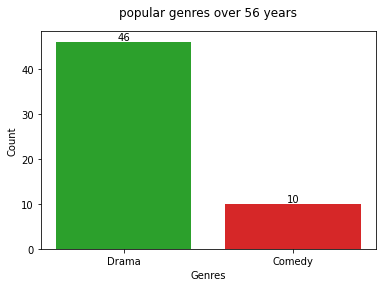

In [686]:
# plot shows the top genres over 56 years

fig, ax = plt.subplots()
ax.bar('Drama', popular_genre.genres.most_common.value_counts()[0])
ax.bar('Comedy', popular_genre.genres.most_common.value_counts()[1])
ax.bar_label(ax.bar('Drama', popular_genre.genres.most_common.value_counts()[0]), fontsize=10)
ax.bar_label(ax.bar('Comedy', popular_genre.genres.most_common.value_counts()[1]), fontsize=10)
ax.set_title('popular genres over 56 years', pad=15)
ax.set_xlabel('Genres')
ax.set_ylabel('Count');

I Found that over 56 years the most popular genre is **Drama by 46 years** and **Comedy by 10 years** these is the most popular genres from 1960 to 2015

<a id='2'></a>
### Research Question 2  (The most correlation with revenue)

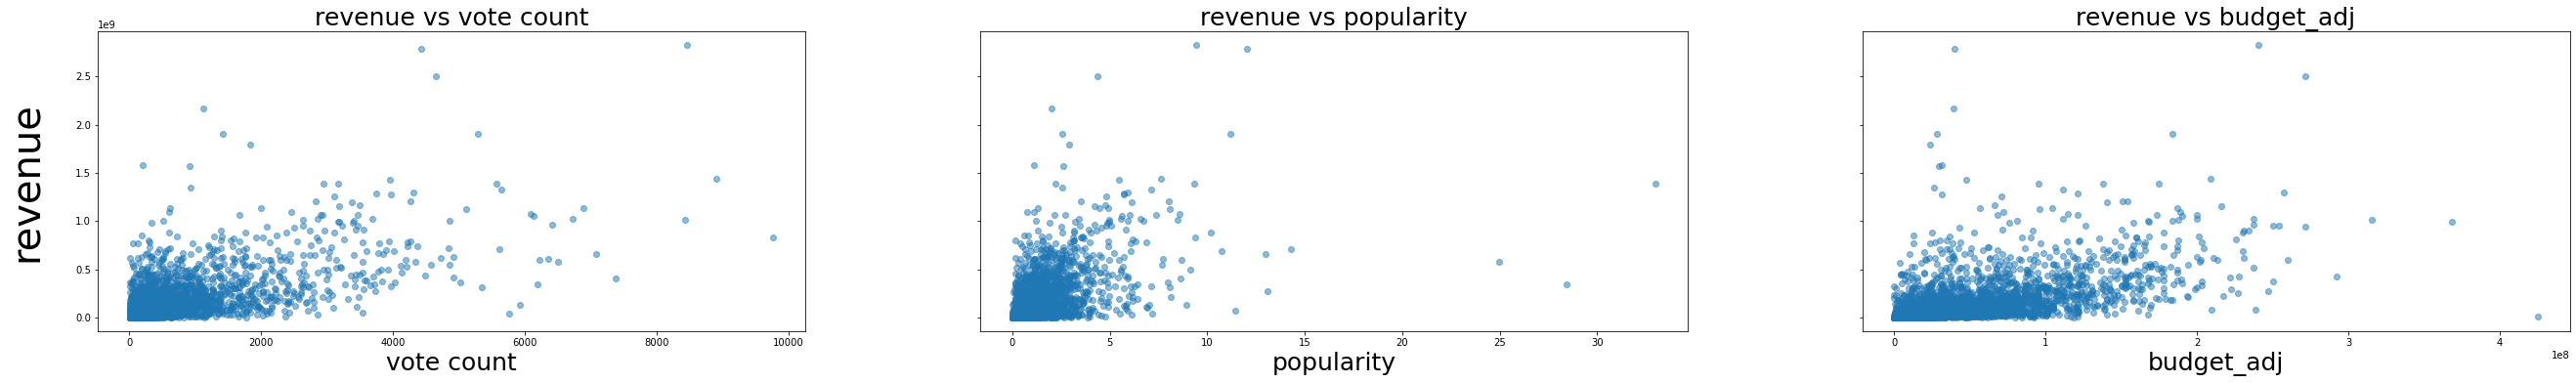

In [711]:
fig, ax = plt.subplots(1, 3, sharey=True)
fig.tight_layout()
fig.set_figwidth(40)
fig.set_figheight(5)

# Graphs input data
ax[0].scatter(df_copy.vote_count, df_copy.revenue_adj, alpha=.5)
ax[1].scatter(df_copy.popularity, df_copy.revenue_adj, alpha=.5)
ax[2].scatter(df_copy.budget_adj, df_copy.revenue_adj, alpha=.5)

# Titles for graphs
ax[0].set_title("revenue vs vote count", fontsize=25)
ax[1].set_title("revenue vs popularity", fontsize=25)
ax[2].set_title("revenue vs budget_adj", fontsize=25)

# Set x label
ax[0].set_xlabel("vote count", fontsize=25)
ax[1].set_xlabel("popularity", fontsize=25)
ax[2].set_xlabel("budget_adj", fontsize=25)

# Set y label
ax[0].set_ylabel('revenue', fontsize=40, labelpad=30);

I found that the most correlation with revenue is **vote count** and **budget**

<a id='3'></a>
### Research Question 3  (Revenue and budget by genres)

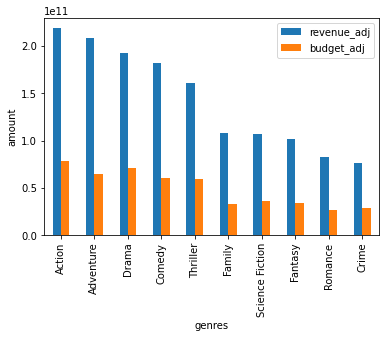

In [712]:
# a plot shows the top genres has revenue and budget
# Group by genres and sum the revenue and budget over these genres
# and sort them up to down and reset index get top 10
genre_revenue = genres.groupby('genres').agg({'revenue_adj': 'sum'}).sort_values('revenue_adj', ascending = False)\
                        .reset_index().head(10)
genre_budget = genres.groupby('genres').agg({'budget_adj': 'sum'}).sort_values('budget_adj', ascending=False)\
                    .reset_index().head(10)
genre_rev_budget_comp = genre_revenue.merge(genre_budget)

# Bar graph
genre_rev_budget_comp.plot(x='genres', y=['revenue_adj', 'budget_adj'], kind='bar')
plt.ylabel("amount");


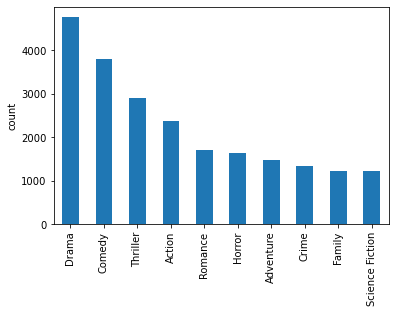

In [713]:
genres.genres.value_counts().head(10).plot(x='genres', kind='bar')
plt.ylabel("count");

I found that the most genre revenue income and budget spend is **Action**, and **Drama** is the most production and even that it doesn't return most revenue.

<a id='4'></a>
### Research Question 4  (revenue & budget of production companies)

In [714]:
# Get the revenue and budget over the production companies 
# Group by the production and sum revenue and budget
# and sort them up to down and reset index and get the top 10
productions = df_productions.merge(df_copy)
production_counts = productions.production.value_counts().reset_index().rename(columns={'production': 'total_count',
                                                'index': 'production'}).head(10)
production_rev_bud = productions.groupby('production').agg({'revenue_adj': 'sum','budget_adj': 'sum'})\
                                .sort_values(['revenue_adj', 'budget_adj'], ascending = False).reset_index().head(10)

In [715]:
dfs = productions.merge(genres)
cat = dfs.groupby(['production', 'genres']).agg({'genres': 'count'}).rename(columns={'genres': 'Action_count'}).reset_index()\
        .sort_values('Action_count', ascending=False)

,production,total_count,genres,Action_count
0,Universal Pictures,522,Action,157
1,Warner Bros.,509,Action,177


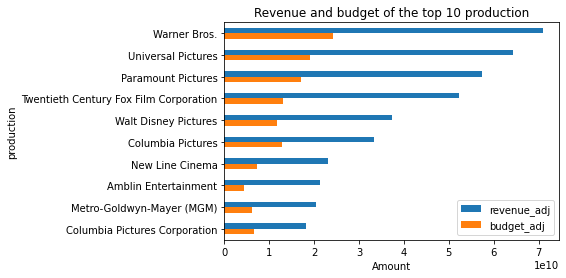

In [716]:
# Making a horizontal bar shows the top 10 production's revenue & budget 
production_rev_bud.plot(x='production', y=['revenue_adj', 'budget_adj'], kind='barh').invert_yaxis()
plt.title('Revenue and budget of the top 10 production')
plt.ylabel("production")
plt.xlabel("Amount");
production_counts.head(2).merge(cat[cat.genres == 'Action'].head(2))

The top production of revenue and budget is **Warner Bros** , But the most production is **Universal Picutres**, **Warner Bros** make better revenue because it producted more action films as we see

<a id='5'></a>
### Research Question 5  (count of top production company that has product)

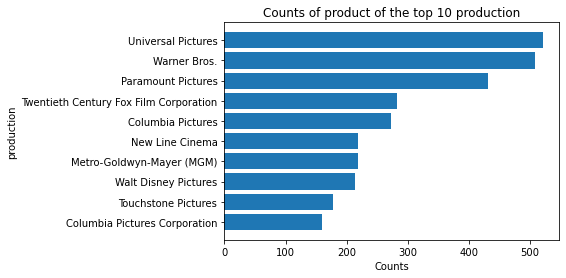

In [717]:
# Get 10 top production companies that has product
plt.barh(production_counts['production'], production_counts['total_count'])
plt.gca().invert_yaxis()
plt.title('Counts of product of the top 10 production')
plt.ylabel('production')
plt.xlabel('Counts');

The top production of product is **Universal Picture**

<a id='6'></a>
### Research Question 6  (track the revenue and budget and popularity over years)

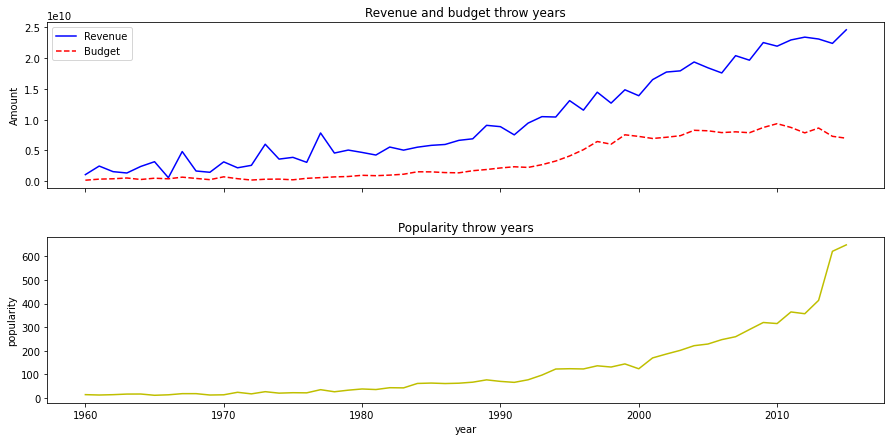

In [720]:
# track the revenue and budget over years
# Group by year and sum the revenue and budget reset index 
rev_bgd_pop_ovy = df_copy.groupby('release_year').agg({'revenue_adj': 'sum', 'budget_adj': 'sum', 
                                                       'popularity': 'sum'}).reset_index()

# Making a line plot shows the revenue and budget over years
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(rev_bgd_pop_ovy['release_year'], rev_bgd_pop_ovy['revenue_adj'], color='b', label='Revenue')
ax[0].plot(rev_bgd_pop_ovy['release_year'], rev_bgd_pop_ovy['budget_adj'], color='r', label='Budget', linestyle='--')
ax[1].plot(rev_bgd_pop_ovy['release_year'], rev_bgd_pop_ovy['popularity'], color='y')

# Adjust plot
ax[0].legend(loc='best')
ax[0].set_ylabel("Amount")
ax[0].set_title('Revenue and budget throw years')
ax[1].set_ylabel('popularity')
ax[1].set_title('Popularity throw years')
ax[1].set_xlabel('year')
fig.set_figwidth(15)
fig.set_figheight(7)
plt.subplots_adjust(hspace=0.3);

I found that revenue & budget & popularity goes up over years

<a id='7'></a>
### Research Question 7  (top movie revenue and budget of every year)

In [721]:
# Get the top movie of every year
# Merge main dataframe with director dataframe
# Get some columns from the merge to analysis them
top_movies_rev_bud = df_copy.merge(df_directors).merge(df_genres)
top_movies_rev_bud[['original_title', 'revenue_adj', 'release_year', 'budget_adj', 'director', 'genres']]\
                    .sort_values(['release_year', 'revenue_adj'], ascending=False).drop_duplicates(subset='release_year')\
                    .set_index('release_year').sort_values('revenue_adj', ascending=False)

,original_title,revenue_adj,budget_adj,director,genres
release_year,,,,,
2009,Avatar,2.827124e+09,2.408869e+08,James Cameron,Science Fiction
1977,Star Wars,2.789712e+09,3.957559e+07,George Lucas,Action
1997,Titanic,2.506406e+09,2.716921e+08,James Cameron,Drama
1973,The Exorcist,2.167325e+09,3.928928e+07,William Friedkin,Drama
1975,Jaws,1.907006e+09,2.836275e+07,Steven Spielberg,Thriller
2015,Star Wars: The Force Awakens,1.902723e+09,1.839999e+08,J.J. Abrams,Fantasy
1982,E.T. the Extra-Terrestrial,1.791694e+09,2.372625e+07,Steven Spielberg,Family
1995,The Net,1.583050e+09,3.148127e+07,Irwin Winkler,Thriller
1961,One Hundred and One Dalmatians,1.574815e+09,2.917944e+07,Wolfgang Reitherman,Adventure


I found that the **Avatar** movie got the most revenue

<a id='8'></a>
### Research Question 8  (top 10 years revenue)

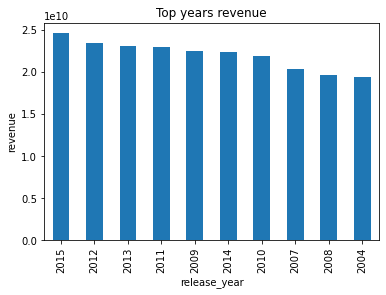

In [722]:
# Find the top year of revenue
# Group by year and sum the revenue and sort from up to down
# and reset index get top 10 years of revenue
top_year_rev = df_copy.groupby('release_year').agg({'revenue_adj': 'sum'}).sort_values('revenue_adj', ascending=False)\
                        .reset_index().head(10)

# a plot shows the years of top revenue
top_year_rev.plot(x='release_year', y='revenue_adj', kind='bar', legend='')
plt.title("Top years revenue")
plt.ylabel('revenue');

The top year got revenue was **2015**

<a id='9'></a>
### Research Question 9  (top 10 movies losses & why)

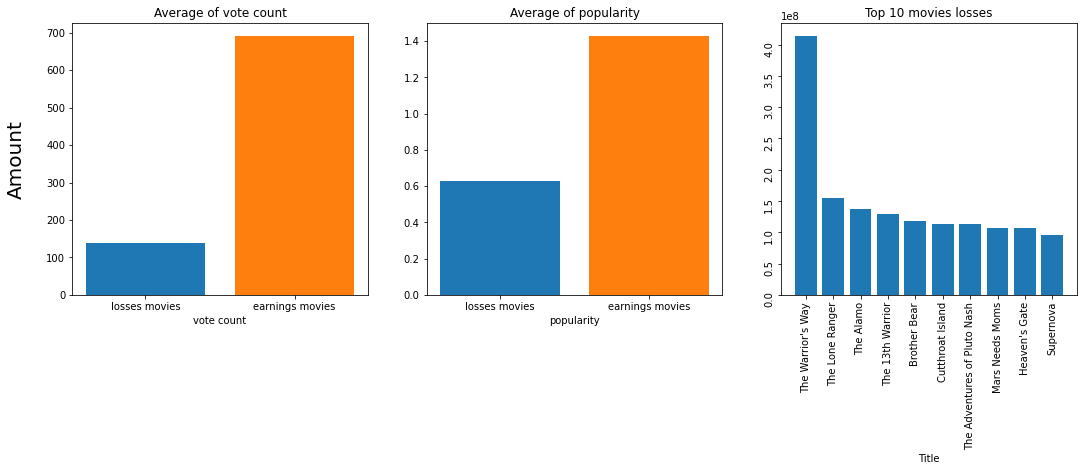

In [773]:
df_copy['profit'] = df_copy['revenue_adj'] - df_copy['budget_adj']
movie_losses = df_copy[df_copy.profit < 0].sort_values('profit')
# I select the values less than 0 and multiple by -1 to make it postive
# to make the plot normal 
movie_losses['profit'] = movie_losses['profit'] * -1
movie_earnings = df_copy[df_copy.profit > 0].sort_values('profit', ascending=False)

# Graphs input data
fig, ax = plt.subplots(1, 3)
ax[0].bar('losses movies', movie_losses.vote_count.sample(1000).mean())
ax[0].bar('earnings movies', movie_earnings.vote_count.sample(1000).mean())
ax[1].bar('losses movies', movie_losses.popularity.sample(1000).mean())
ax[1].bar('earnings movies', movie_earnings.popularity.sample(1000).mean())
ax[2].bar(movie_losses.original_title.head(10), movie_losses.profit.head(10))

# Titles for graphs
ax[0].set_title("Average of vote count")
ax[1].set_title("Average of popularity")
ax[2].set_title('Top 10 movies losses')

# Set x label
ax[0].set_xlabel("vote count")
ax[1].set_xlabel("popularity")
ax[2].set_xlabel("Title")

# Rotate the x axis ticks
ax[2].tick_params(labelrotation=90)

# Set y label
ax[0].set_ylabel('Amount', fontsize=20, labelpad = 20)

# Figure customize
fig.set_figwidth(18)
fig.set_figheight(5);

By calculating the average of **vote count** & **popularity** of two types of movie, movies that hasn't revenue and other have revenue, i found that the movies has losses got low popularity and low vote 

<a id='conclusions'></a>
## Conclusions
>**Results**
><ol>
    <font color='#333'>
    <li>Drama is the most popular genre, following by comedy</li>
    <li>The most correlation with revenue is the vote count, following by budget</li>
    <li>The most genre revenue and budget is Action, following by Adventure</li>
    <li>The most production company's revenue is Warner Bros, following by Universal Pictures</li>
    <li>The most prodction company has product is Unviersal Pictures, following by Warner Bros</li>
    <li>Revenue & budget and popularity increase over years</li>
    <li>The top movie revenue is Avatar, following by Star Wars</li>
    <li>The top year revenue is 2015, following by 2012</li>
    <li>The top movie lose money is The Warrior's Way</li>
    </font>
</ol>

>**Limitations**
><ol>
    <li>There's some null values in keywords and tagline</li>
    <li>There is alot missing values in revenue and budget columns</li>
    <li>During the data cleaning process, I split the data seperated by '|' into lists. This increases the time taken in calculating the result</li>
 </ol>